In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import skimpy

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score
# from sklearn.preprocessing import StandardScaler
from sklearn import set_config

from colorama import Style, Fore

In [2]:
pd.set_option('display.max_rows', 100)
set_config(transform_output = 'pandas')
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk("C:/For Internships & Job Applications/personal project/Wine Clustering"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
%matplotlib inline
from collections import Counter
from sklearn.cluster import KMeans

## Exploratory Data Analysis

In [4]:
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
print(f"{Style.BRIGHT}{Fore.BLUE} SHAPE")
print(f'{Style.BRIGHT}{Fore.BLUE} -> train: {Fore.GREEN} {df.shape}')

print(f"\n\n{Style.BRIGHT}{Fore.BLUE} NULL VALUES")
print(f"{Style.BRIGHT}{Fore.BLUE} -> Train: {Fore.GREEN} {df.isnull().any().any()}")

 SHAPE
 -> train:  (178, 13)


 NULL VALUES
 -> Train:  False


In [7]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 178    │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 13     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Alcohol                │   0 │     0 │      13 │ 0.8118 │ 11.03 │  12.36 │ 13.05 │  13.68 │ 14.83 │ ▂▆▇▇▇▂ │  │
│ │ Malic_Acid             │   0 │     0 │   2.336 │  1.117 │  0.74 │  1.603 │ 1.865 │  3.083 │   5.8 │ ▅▇▃▃▁▁ │  │
│ │ Ash                    │   0 │     0 │   2.367 │ 0.2743 │  1.36 │   2.21 │  2.36 │  2.558 │  3.23 │  ▂▆▇▃  │  │
│ │ Ash_Alcanity           │   0 │     0 │   19.49 │   3.34 │  10.6 │   17.2 │  19.5 │   21.5 │    30 │ ▁▅▇▅▂  │  │
│ │ Magnesium              │   0 │     0 │   99.74 │  14.28 │    70 │     88 │    98 │    107 │   162 │  ▂▇▅▂  │  │
│ │ Total_Phenols          │   0 │     0 │   2.295 │ 0.6259 │  0.98 │  1.742 │ 2.355 │    2.8 │  3.88 │ ▃▇▆▇▅▁ │  │
│ │ Flavanoids             │   0 │     0 │   2.029 │ 0.9989 │  0.34 │  1.205 │ 2.135 │  2.875 │  5.08 │ ▇▆▇▇▁  │  │
│ │ Nonflavanoid_Phenols   │   0 │     0 │  0.3619 │ 0.1245 │  0.13 │   0.27 │  0.34 │ 0.4375 │  0.66 │ ▃▇▅▅▃▂ │  │
│ │ Proanthocyanins        │   0 │     0 │   1.591 │ 0.5724 │  0.41 │   1.25 │ 1.555 │   1.95 │  3.58 │ ▃▇▇▃▁  │  │
│ │ Color_Intensity        │   0 │     0 │   5.058 │  2.318 │  1.28 │   3.22 │  4.69 │    6.2 │    13 │ ▆▇▆▃▂  │  │
│ │ Hue                    │   0 │     0 │  0.9574 │ 0.2286 │  0.48 │ 0.7825 │ 0.965 │   1.12 │  1.71 │ ▃▅▇▅▁  │  │
│ │ OD280                  │   0 │     0 │   2.612 │   0.71 │  1.27 │  1.938 │  2.78 │   3.17 │     4 │ ▅▅▃▇▇▂ │  │
│ │ Proline                │   0 │     0 │   746.9 │  314.9 │   278 │  500.5 │ 673.5 │    985 │  1680 │ ▇▇▃▃▂▁ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴───────┴────────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Correlation Matrix

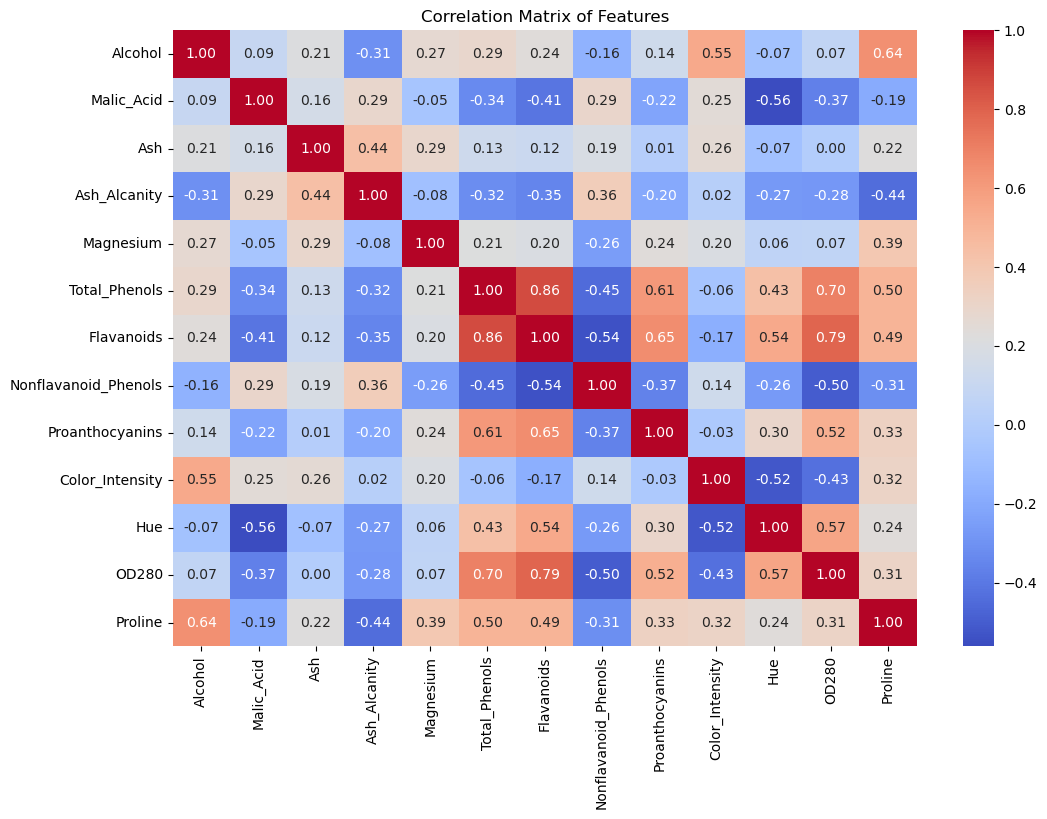

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True,
            cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

Dropping high correlation to remove redundancy for our clustering

In [10]:
numeric_to_drop = []
correlation_threshold = 0.7

for i in range(len(list(df.columns))-1):
    for j in range(i+1, len(list(df.columns))-1):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            feat1, feat2 = list(df.columns)[i], list(df.columns)[j]

            corr1 = corr_matrix[feat1].abs().mean()
            corr2 = corr_matrix[feat2].abs().mean()
            numeric_to_drop.append(feat2 if corr1 > corr2 else feat1)

numeric_selected = [f for f in list(df.columns) if f not in set(numeric_to_drop)]
print("\nNumeric Feature Selection:")
print("Dropped numeric features:", list(set(numeric_to_drop)))
print("Selected numeric features:", numeric_selected)


Numeric Feature Selection:
Dropped numeric features: ['Total_Phenols', 'OD280']
Selected numeric features: ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'Proline']


## Find optimal number of clusters using silhouette score

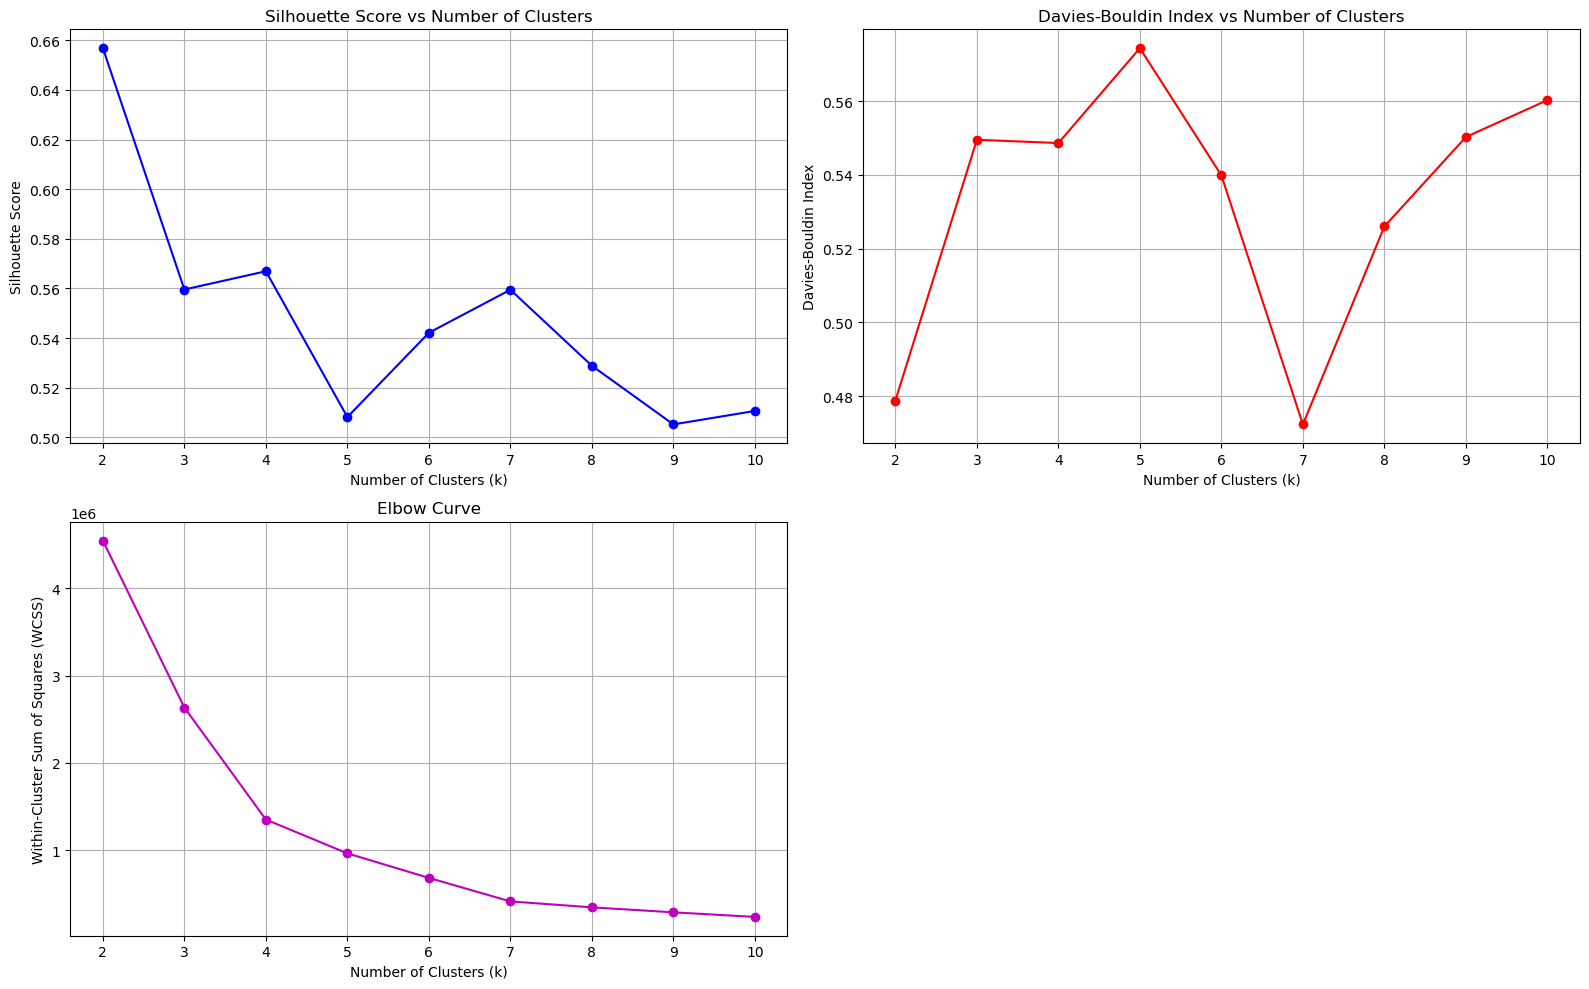


Optimal number of clusters based on Silhouette Score: 2
Optimal number of clusters based on Davies-Bouldin Index: 7


In [11]:
silhouette_scores = []
davies_scores = []
inertias = []
numeric_selected = df.columns
# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(df[numeric_selected])

K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_selected])
    
    labels = kmeans.labels_
    
    silhouette_scores.append(silhouette_score(df[numeric_selected], labels))
    davies_scores.append(davies_bouldin_score(df[numeric_selected], labels))
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(K, davies_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(K, inertias, 'mo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

optimal_k_silhouette = K[np.argmax(silhouette_scores)]
optimal_k_davies = K[np.argmin(davies_scores)]  # Davies-Bouldin should be minimized

print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")
print(f"Optimal number of clusters based on Davies-Bouldin Index: {optimal_k_davies}")

## K-Means Model fitting

In [12]:
df_Kmeans = df[numeric_selected].copy()
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_Kmeans)

KMeans(n_clusters=2)

In [13]:
pred = kmeans.predict(df_Kmeans)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [14]:
plt.scatter(x=df_Kmeans.loc[:, ["Malic_Acid"]], 
            y=df_Kmeans.loc[:, ["Proline"]], c=pred)

In [15]:
silhouette_score(df_Kmeans, labels=kmeans.labels_, metric='euclidean')

0.6568536504294317

# Affinity Propagation

In [16]:
df_AP = df[numeric_selected].copy()

afprop = AffinityPropagation(verbose=True, random_state=42, max_iter=250)
afprop.fit(df_AP)

Converged after 99 iterations.


AffinityPropagation(max_iter=250, random_state=42, verbose=True)

In [17]:
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
AP_predict = afprop.predict(df_AP)

In [18]:
plt.scatter(x=df_AP.loc[:, ["Malic_Acid"]], 
            y=df_AP.loc[:, ["Proline"]], c=AP_predict)

In [19]:
silhouette_score(df_AP, labels=afprop.labels_, metric='euclidean')

0.535178128823316